In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from google.colab import drive
from tabulate import tabulate

In [ ]:
#Reading the data
drive.mount('/content/drive/')
cal_data = pd.read_csv('/content/drive/MyDrive/dataset2/calendar.csv')
salestv_data = pd.read_csv('/content/drive/MyDrive/dataset2/tableau_sales_train_validation_365_days.csv')
saleste_data = pd.read_csv('/content/drive/MyDrive/dataset2/tableau_sales_train_evaluation_365_days.csv')
sellp_data = pd.read_csv('/content/drive/MyDrive/dataset2/sell_prices.csv')

Mounted at /content/drive/


In [ ]:
salestv_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_356,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,1,8,1,3,0,1,2,3
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
cal_data.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


##OBSERVATION: Here we have data for 371 columns. We will use this dataframe for testing.

In [ ]:
print(salestv_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 371 entries, id to d_365
dtypes: int64(365), object(6)
memory usage: 86.3+ MB
None


#Downcasting

In [ ]:
# To reduce memory usage
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == 'float64']
    int_cols = [c for c in df if df[c].dtype in ['int32', 'int64']]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df

In [ ]:
salestv_data_downcast = downcast_dtypes(salestv_data)

In [ ]:
print(salestv_data_downcast.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 371 entries, id to d_365
dtypes: int16(365), object(6)
memory usage: 22.6+ MB
None


In [ ]:
salestv_data_downcast.shape
salestv_data_downcast.head(8)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_356,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,1,8,1,3,0,1,2,3
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,HOBBIES_1_007_CA_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,...,7,4,20,26,0,9,14,0,8,18


In [ ]:
salestv_data = salestv_data_downcast

##Handling missing values through imputation

In [ ]:
#Clearly in calender.csv we have many entries which contain NaN in event_type_1,event_type_2,event_name_1 & enent_name_2
#replaced all those entries with no_event
cal_data = cal_data.fillna(value='no_event')

In [ ]:
cal_data.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,no_event,no_event,no_event,no_event,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,no_event,no_event,no_event,no_event,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,no_event,no_event,no_event,no_event,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,no_event,no_event,no_event,no_event,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,no_event,no_event,no_event,no_event,1,0,1


In [ ]:
cal_data.shape

(1969, 14)

#Optimizing the dataframes

##Making a final dataset which contains all the necessary values in one table.

##First, we start of by changing most of the columns with string type data to categorical dtype as almost all the columns are categories in this dataset.

In [ ]:
salestv_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_356,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,1,8,1,3,0,1,2,3
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
salestv_data = salestv_data.reset_index() 

In [ ]:
salestv_data.head()

,index,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,...,d_356,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365
0,0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,1,1,8,1,3,0,1,2,3
4,4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
l=[]
for i in range(1,366):
  l.append("d_"+str(i))
df_final=pd.melt(salestv_data,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],\
                 value_vars=l,var_name="d",value_name="sales")

In [ ]:
df_final

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
...,...,...,...,...,...,...,...,...
11128845,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_365,0
11128846,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_365,0
11128847,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_365,1
11128848,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_365,0


In [ ]:
df_final.drop(df_final[df_final['sales'] == 0].index, inplace = True)

In [ ]:
#Now we merge all these 3 dataframes to get final csv file train
data=df_final.merge(cal_data,on='d',copy=False)# combine calender.csv and modified trainvalidation.csv on feature 'd'
data=data.merge(sellp_data,on=["store_id", "item_id", "wm_yr_wk"],copy=False) # combine new dataframe with sell_price.csv usnig features "store_id", "item_id", "wm_yr_wk"
data.drop(data[data['sales'] == 0].index, inplace = True)
#storing this final dataframe to final_dataframe.csv
data.to_csv('final_dataframe.csv')

In [ ]:
data.shape

(2487327, 22)

In [ ]:
#reading up complete dataframe
data = pd.read_csv('final_dataframe.csv')

In [ ]:
data.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
data_features = data.copy()

#Exploring various properties of DataFrame

In [ ]:
print("Head rows of Final DataFrame train")
data.shape

Head rows of Final DataFrame train


(2487327, 22)

In [ ]:
print("Colums present in dataFrame are",data.columns.values)

Colums present in dataFrame are ['id' 'item_id' 'dept_id' 'cat_id' 'store_id' 'state_id' 'd' 'sales'
 'date' 'wm_yr_wk' 'weekday' 'wday' 'month' 'year' 'event_name_1'
 'event_type_1' 'event_name_2' 'event_type_2' 'snap_CA' 'snap_TX'
 'snap_WI' 'sell_price']


In [ ]:
data.sample(10)

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
356811,HOUSEHOLD_1_278_TX_2_validation,HOUSEHOLD_1_278,HOUSEHOLD_1,HOUSEHOLD,TX_2,TX,d_53,1,2011-03-22,11108,...,3,2011,no_event,no_event,no_event,no_event,0,0,0,6.27000
2305527,HOUSEHOLD_1_236_WI_3_validation,HOUSEHOLD_1_236,HOUSEHOLD_1,HOUSEHOLD,WI_3,WI,d_343,5,2012-01-06,11149,...,1,2012,no_event,no_event,no_event,no_event,1,1,1,2.64000
391886,FOODS_2_232_WI_3_validation,FOODS_2_232,FOODS_2,FOODS,WI_3,WI,d_63,3,2011-04-01,11109,...,4,2011,no_event,no_event,no_event,no_event,1,1,0,2.28000
443136,HOBBIES_1_326_TX_1_validation,HOBBIES_1_326,HOBBIES_1,HOBBIES,TX_1,TX,d_68,1,2011-04-06,11110,...,4,2011,no_event,no_event,no_event,no_event,1,1,1,1.97000
942092,FOODS_2_190_WI_3_validation,FOODS_2_190,FOODS_2,FOODS,WI_3,WI,d_146,4,2011-06-23,11121,...,6,2011,no_event,no_event,no_event,no_event,0,0,0,2.88000
1992144,HOUSEHOLD_2_480_CA_4_validation,HOUSEHOLD_2_480,HOUSEHOLD_2,HOUSEHOLD,CA_4,CA,d_295,1,2011-11-19,11143,...,11,2011,no_event,no_event,no_event,no_event,0,0,0,5.27000
1637769,FOODS_3_099_CA_4_validation,FOODS_3_099,FOODS_3,FOODS,CA_4,CA,d_247,11,2011-10-02,11136,...,10,2011,no_event,no_event,no_event,no_event,1,0,1,2.50000
657019,HOBBIES_1_103_WI_1_validation,HOBBIES_1_103,HOBBIES_1,HOBBIES,WI_1,WI,d_103,3,2011-05-11,11115,...,5,2011,no_event,no_event,no_event,no_event,0,1,1,0.68000
1167931,FOODS_3_360_TX_3_validation,FOODS_3_360,FOODS_3,FOODS,TX_3,TX,d_177,8,2011-07-24,11126,...,7,2011,no_event,no_event,no_event,no_event,0,0,0,2.48000
1863364,HOBBIES_1_226_CA_2_validation,HOBBIES_1_226,HOBBIES_1,HOBBIES,CA_2,CA,d_275,1,2011-10-30,11140,...,10,2011,no_event,no_event,no_event,no_event,0,0,0,14.97000


In [ ]:
data_in = data.copy()

##We need to perform the analysis on HOUSEHOLD category, hence the rows with FOODS and HOBBIES category are dropped.

In [ ]:
data.drop(data[data['cat_id'] == 'FOODS'].index, inplace = True)
data.drop(data[data['cat_id'] == 'HOBBIES'].index, inplace = True)

In [ ]:
data.shape

(736421, 22)

In [ ]:
data.sample(10)

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
1376374,HOUSEHOLD_1_367_WI_1_validation,HOUSEHOLD_1_367,HOUSEHOLD_1,HOUSEHOLD,WI_1,WI,d_210,1,2011-08-26,11130,...,8,2011,no_event,no_event,no_event,no_event,0,0,0,3.97
650993,HOUSEHOLD_1_350_TX_2_validation,HOUSEHOLD_1_350,HOUSEHOLD_1,HOUSEHOLD,TX_2,TX,d_100,2,2011-05-08,11115,...,5,2011,Mother's day,Cultural,no_event,no_event,1,0,1,2.98
1469566,HOUSEHOLD_2_064_WI_1_validation,HOUSEHOLD_2_064,HOUSEHOLD_2,HOUSEHOLD,WI_1,WI,d_220,1,2011-09-05,11132,...,9,2011,LaborDay,National,no_event,no_event,1,1,1,3.87
2015302,HOUSEHOLD_2_447_CA_2_validation,HOUSEHOLD_2_447,HOUSEHOLD_2,HOUSEHOLD,CA_2,CA,d_296,1,2011-11-20,11143,...,11,2011,no_event,no_event,no_event,no_event,0,0,0,1.97
793612,HOUSEHOLD_1_413_WI_1_validation,HOUSEHOLD_1_413,HOUSEHOLD_1,HOUSEHOLD,WI_1,WI,d_120,1,2011-05-28,11118,...,5,2011,no_event,no_event,no_event,no_event,0,0,0,17.97
1719017,HOUSEHOLD_2_108_CA_3_validation,HOUSEHOLD_2_108,HOUSEHOLD_2,HOUSEHOLD,CA_3,CA,d_255,2,2011-10-10,11137,...,10,2011,ColumbusDay,National,no_event,no_event,1,0,0,8.87
2437481,HOUSEHOLD_1_541_CA_3_validation,HOUSEHOLD_1_541,HOUSEHOLD_1,HOUSEHOLD,CA_3,CA,d_358,6,2012-01-21,11152,...,1,2012,no_event,no_event,no_event,no_event,0,0,0,7.97
2148170,HOUSEHOLD_2_257_TX_2_validation,HOUSEHOLD_2_257,HOUSEHOLD_2,HOUSEHOLD,TX_2,TX,d_316,2,2011-12-10,11146,...,12,2011,no_event,no_event,no_event,no_event,1,0,0,5.94
742649,HOUSEHOLD_2_193_TX_2_validation,HOUSEHOLD_2_193,HOUSEHOLD_2,HOUSEHOLD,TX_2,TX,d_113,4,2011-05-21,11117,...,5,2011,no_event,no_event,no_event,no_event,0,0,0,4.94
1918663,HOUSEHOLD_1_303_TX_2_validation,HOUSEHOLD_1_303,HOUSEHOLD_1,HOUSEHOLD,TX_2,TX,d_282,1,2011-11-06,11141,...,11,2011,no_event,no_event,no_event,no_event,1,1,1,0.94


In [ ]:
print("Complete information about data Frame is:-\n")
print(data.info())

Complete information about data Frame is:-

<class 'pandas.core.frame.DataFrame'>
Int64Index: 736421 entries, 510 to 2486769
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            736421 non-null  object 
 1   item_id       736421 non-null  object 
 2   dept_id       736421 non-null  object 
 3   cat_id        736421 non-null  object 
 4   store_id      736421 non-null  object 
 5   state_id      736421 non-null  object 
 6   d             736421 non-null  object 
 7   sales         736421 non-null  int64  
 8   date          736421 non-null  object 
 9   wm_yr_wk      736421 non-null  int64  
 10  weekday       736421 non-null  object 
 11  wday          736421 non-null  int64  
 12  month         736421 non-null  int64  
 13  year          736421 non-null  int64  
 14  event_name_1  736421 non-null  object 
 15  event_type_1  736421 non-null  object 
 16  event_name_2  736421 non-null  object 
 17  e

In [ ]:
data_features = data.copy()

# Feature Engineering
##We try to create two new features, weather data and median income through feature engineering.

##We have taken the weather data from the National Oceanic and Atmospheric Administration website. 

In [ ]:
weather = pd.read_csv('/content/drive/MyDrive/dataset2/weather.csv')
weather.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'WT01',
       'WT03', 'WT04', 'WT05', 'WT06', 'WT11'],
      dtype='object')

In [ ]:
weather.sample(5)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,WT01,WT03,WT04,WT05,WT06,WT11
12962,USC00045123,"LOS GATOS, CA US",37.231900,-121.959200,111.3,2011-06-18,NaN,NaN,NaN,NaN,NaN,NaN
16627,USC00043244,"FREMONT, CA US",37.542200,-122.015800,11.6,2011-06-26,NaN,NaN,NaN,NaN,NaN,NaN
12604,US1WIOZ0005,"CEDARBURG 3.7 WSW, WI US",43.278763,-88.056643,267.9,2015-06-21,NaN,NaN,NaN,NaN,NaN,NaN
11235,USC00413370,"FRISCO, TX US",33.192400,-96.793000,227.7,2015-05-01,NaN,NaN,NaN,NaN,NaN,NaN
16203,USR0000CLGA,"LOS GATOS CALIFORNIA, CA US",37.202800,-121.942800,609.6,2015-09-11,NaN,NaN,NaN,NaN,NaN,NaN


Here, we can see the fields of weather data, it shows weather according to the zip code of the location, and also takes into consideration the elevation of that location. It can be observed that weather is classified into 6 different classes, viz, WT01, WT03, WT04, WT05, WT06 and WT11. We can also observe that there is no common field in the weather dataset and the other given datasets.

To make this connection, we map unique entities of the column “NAME” in the weather dataset to the column “store_id” in the sales_train_validation dataset.

In [ ]:
weather[['WT01','WT03', 'WT04', 'WT05', 'WT06', 'WT11']] = weather[['WT01','WT03', 'WT04', 'WT05', 'WT06', 'WT11']].fillna(0)
def randWTCol():
  return 5 + np.random.randint(low=1, high=7)

for row in range(weather.shape[0]):
  if int(weather.iloc[row:row+1,6:12].sum(axis=1)) == 0:
    rand_WT_col_in_row = randWTCol()
    weather.iloc[row:row+1, rand_WT_col_in_row:rand_WT_col_in_row+1] = 1

def map_location_code(location):
  map_location_code = {
      'LONG':'CA_1',
      'LOS':'CA_2',
      'SAN':'CA_3',
      'FREMONT':'CA_4',
      'FREMONT,':'CA_4',
      'ROCKWALL':'TX_1',
      'FRISCO':'TX_2',
      'FRISCO,':'TX_2',
      'SACHSE':'TX_3',
      'WATERTOWN':'WI_1',
      'MEQUON':'WI_2',
      'THERESA':'WI_3'     
  }
  try:
    return map_location_code[location.split(' ')[0]]
  except:
    return location
    
weather['store_id'] = weather.apply(lambda row: map_location_code(row['NAME']), axis=1)

weather['date'] = pd.to_datetime(weather['DATE'])
weather['d'] = pd.to_datetime('2011-01-29')
weather['d'] = ((weather['date'] - weather['d']).dt.days + 1).astype(str) # 2011-01-29 should be 1, not 0
weather['d'] = 'd_'+ weather['d']

In [ ]:
display(weather)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,WT01,WT03,WT04,WT05,WT06,WT11,store_id,date,d
0,US1CAAL0024,"FREMONT 3.7 NE, CA US",37.571972,-121.95903,31.1,2014-12-18,0.0,0.0,0.0,1.0,0.0,0.0,CA_4,2014-12-18,d_1420
1,US1CAAL0024,"FREMONT 3.7 NE, CA US",37.571972,-121.95903,31.1,2014-12-19,0.0,0.0,0.0,0.0,1.0,0.0,CA_4,2014-12-19,d_1421
2,US1CAAL0024,"FREMONT 3.7 NE, CA US",37.571972,-121.95903,31.1,2014-12-20,1.0,0.0,0.0,0.0,0.0,0.0,CA_4,2014-12-20,d_1422
3,US1CAAL0024,"FREMONT 3.7 NE, CA US",37.571972,-121.95903,31.1,2014-12-21,0.0,0.0,0.0,0.0,0.0,1.0,CA_4,2014-12-21,d_1423
4,US1CAAL0024,"FREMONT 3.7 NE, CA US",37.571972,-121.95903,31.1,2014-12-25,0.0,1.0,0.0,0.0,0.0,0.0,CA_4,2014-12-25,d_1427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18389,USC00043244,"FREMONT, CA US",37.542200,-122.01580,11.6,2016-06-15,0.0,0.0,0.0,1.0,0.0,0.0,CA_4,2016-06-15,d_1965
18390,USC00043244,"FREMONT, CA US",37.542200,-122.01580,11.6,2016-06-16,1.0,0.0,0.0,0.0,0.0,0.0,CA_4,2016-06-16,d_1966
18391,USC00043244,"FREMONT, CA US",37.542200,-122.01580,11.6,2016-06-17,0.0,0.0,0.0,1.0,0.0,0.0,CA_4,2016-06-17,d_1967
18392,USC00043244,"FREMONT, CA US",37.542200,-122.01580,11.6,2016-06-18,1.0,0.0,0.0,0.0,0.0,0.0,CA_4,2016-06-18,d_1968


In [ ]:
weather = weather.drop(['STATION', 'LATITUDE', 'LONGITUDE', 'ELEVATION','DATE'], axis = 1)

In [ ]:
weather.rename(columns={'LOCATION_CODE': 'store_id', 'DATE_COUNT': 'd'}, inplace=True)

In [ ]:
weather.sample(10)

,NAME,WT01,WT03,WT04,WT05,WT06,WT11,store_id,date,d
11618,"FRISCO, TX US",0.0,0.0,0.0,0.0,0.0,1.0,TX_2,2016-05-18,d_1937
6716,"SACHSE 0.8 S, TX US",0.0,1.0,0.0,0.0,0.0,0.0,TX_3,2015-08-12,d_1657
17092,"FREMONT, CA US",0.0,1.0,0.0,0.0,0.0,0.0,CA_4,2012-11-05,d_647
2444,"SAN DIEGO 5.2WNW, CA US",1.0,0.0,0.0,0.0,0.0,0.0,CA_3,2014-06-16,d_1235
6732,"SACHSE 0.8 S, TX US",0.0,0.0,1.0,0.0,0.0,0.0,TX_3,2015-08-30,d_1675
6541,"LONG BEACH 1.1 SE, CA US",0.0,0.0,1.0,0.0,0.0,0.0,CA_1,2012-12-18,d_690
7389,"SACHSE 1.0 NE, TX US",0.0,0.0,0.0,1.0,0.0,0.0,TX_3,2016-04-12,d_1901
17594,"FREMONT, CA US",1.0,0.0,0.0,0.0,0.0,0.0,CA_4,2014-04-03,d_1161
2874,"SAN DIEGO 5.2WNW, CA US",1.0,0.0,0.0,0.0,0.0,0.0,CA_3,2015-08-22,d_1667
12384,"CEDARBURG 3.7 WSW, WI US",0.0,0.0,1.0,0.0,0.0,0.0,"CEDARBURG 3.7 WSW, WI US",2014-05-20,d_1208


In [ ]:
data_features = data_features.drop(['id','state_id','wm_yr_wk'], axis = 1)
data_features.head()

,item_id,dept_id,cat_id,store_id,d,sales,date,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
510,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,CA_1,d_1,3,2011-01-29,Saturday,1,1,2011,no_event,no_event,no_event,no_event,0,0,0,6.32
511,HOUSEHOLD_1_002,HOUSEHOLD_1,HOUSEHOLD,CA_1,d_1,1,2011-01-29,Saturday,1,1,2011,no_event,no_event,no_event,no_event,0,0,0,6.32
512,HOUSEHOLD_1_002,HOUSEHOLD_1,HOUSEHOLD,CA_1,d_2,1,2011-01-30,Sunday,2,1,2011,no_event,no_event,no_event,no_event,0,0,0,6.32
513,HOUSEHOLD_1_002,HOUSEHOLD_1,HOUSEHOLD,CA_1,d_3,2,2011-01-31,Monday,3,1,2011,no_event,no_event,no_event,no_event,0,0,0,6.32
514,HOUSEHOLD_1_002,HOUSEHOLD_1,HOUSEHOLD,CA_1,d_4,4,2011-02-01,Tuesday,4,2,2011,no_event,no_event,no_event,no_event,1,1,0,6.32


In [ ]:
data_features['date'] = pd.to_datetime(data_features['date'])

In [ ]:
data_features = pd.merge(data_features,weather)
data_features.head()

,item_id,dept_id,cat_id,store_id,d,sales,date,weekday,wday,month,...,snap_TX,snap_WI,sell_price,NAME,WT01,WT03,WT04,WT05,WT06,WT11
0,HOUSEHOLD_1_004,HOUSEHOLD_1,HOUSEHOLD,CA_2,d_1,1,2011-01-29,Saturday,1,1,...,0,0,1.98,"LOS GATOS, CA US",0.0,0.0,1.0,0.0,0.0,0.0
1,HOUSEHOLD_1_004,HOUSEHOLD_1,HOUSEHOLD,CA_2,d_1,1,2011-01-29,Saturday,1,1,...,0,0,1.98,"LOS GATOS CALIFORNIA, CA US",0.0,1.0,0.0,0.0,0.0,0.0
2,HOUSEHOLD_1_005,HOUSEHOLD_1,HOUSEHOLD,CA_2,d_1,2,2011-01-29,Saturday,1,1,...,0,0,10.72,"LOS GATOS, CA US",0.0,0.0,1.0,0.0,0.0,0.0
3,HOUSEHOLD_1_005,HOUSEHOLD_1,HOUSEHOLD,CA_2,d_1,2,2011-01-29,Saturday,1,1,...,0,0,10.72,"LOS GATOS CALIFORNIA, CA US",0.0,1.0,0.0,0.0,0.0,0.0
4,HOUSEHOLD_1_011,HOUSEHOLD_1,HOUSEHOLD,CA_2,d_1,1,2011-01-29,Saturday,1,1,...,0,0,4.63,"LOS GATOS, CA US",0.0,0.0,1.0,0.0,0.0,0.0


#Observation: Here we can see that each row now has a corresponding store ID as well as a day number, which is similar to the sales_train_validation dataset and now we can easily merge these two datasets to make better predictions.

In [ ]:
income_2011 = pd.read_csv('/content/drive/MyDrive/dataset2/ACSST5Y2011.S1903-Data.csv')
income_2012 = pd.read_csv('/content/drive/MyDrive/dataset2/ACSST5Y2012.S1903-Data.csv')

In [ ]:
income_2011 = income_2011.drop(income_2011.loc[:, 'S1903_C02_001MA':'S1903_C02_030MA'].columns, axis=1)
income_2011 = income_2011.drop(income_2011.loc[:, 'S1903_C01_001E':'S1903_C01_001EA'].columns, axis=1)
income_2011 = income_2011.drop(income_2011.loc[:, 'S1903_C02_001M':'Unnamed: 242'].columns, axis=1)
income_2011.shape
income_2011.columns

Index(['GEO_ID', 'NAME', 'S1903_C02_001E'], dtype='object')

In [ ]:
income_2012 = income_2012.drop(income_2012.loc[:, 'S1903_C02_001MA':'S1903_C02_030MA'].columns, axis=1)
income_2012 = income_2012.drop(income_2012.loc[:, 'S1903_C01_001E':'S1903_C01_001EA'].columns, axis=1)
income_2012 = income_2012.drop(income_2012.loc[:, 'S1903_C02_001M':'Unnamed: 242'].columns, axis=1)
income_2012.shape
income_2012.columns

Index(['GEO_ID', 'NAME', 'S1903_C02_001E'], dtype='object')

In [ ]:
income_2011 = income_2011.drop('GEO_ID', axis = 1)
income_2012 = income_2012.drop('GEO_ID', axis = 1)

In [ ]:
income_2012 = income_2012.drop(0, axis = 0)
income_2011 = income_2011.drop(0, axis = 0)

In [ ]:
income_2011['S1903_C02_001E'] = income_2011['S1903_C02_001E'].astype(int)
income_2012['S1903_C02_001E'] = income_2012['S1903_C02_001E'].astype(int)

##Creating a new row for the zip code "75033" (as we did not find any income data for that zip code) and filling it with the average of all the median incomes.

In [ ]:
df_2011 = pd.DataFrame(income_2011)
median_avg_2011 = df_2011["S1903_C02_001E"].mean()
new_zip_2011 = {'NAME' : 'ZCTA5 75033', 'S1903_C02_001E' : median_avg_2011}
df_2011 = df_2011.append(new_zip_2011, ignore_index = True)
df_2011['S1903_C02_001E'] = df_2011['S1903_C02_001E'].astype(int)
display(df_2011)

,NAME,S1903_C02_001E
0,ZCTA5 53091,56830
1,ZCTA5 53092,99123
2,ZCTA5 53094,51205
3,ZCTA5 75032,92526
4,ZCTA5 75048,87721
5,ZCTA5 90804,43489
6,ZCTA5 92107,60673
7,ZCTA5 94536,84840
8,ZCTA5 95032,118713
9,ZCTA5 75033,77235


In [ ]:
df_2012 = pd.DataFrame(income_2012)
median_avg_2012 = df_2012["S1903_C02_001E"].mean()
new_zip_2012 = {'NAME' : 'ZCTA5 75033', 'S1903_C02_001E' : median_avg_2012}
df_2012 = df_2012.append(new_zip_2012, ignore_index = True)
df_2012['S1903_C02_001E'] = df_2012['S1903_C02_001E'].astype(int)
display(df_2012)

,NAME,S1903_C02_001E
0,ZCTA5 53091,55052
1,ZCTA5 53092,96083
2,ZCTA5 53094,50422
3,ZCTA5 75032,91456
4,ZCTA5 75048,88691
5,ZCTA5 90804,41642
6,ZCTA5 92107,61680
7,ZCTA5 94536,85196
8,ZCTA5 95032,122512
9,ZCTA5 75033,76970


### Attaching new columns, "Year" and "Store_ID" to both df_2011 and df_2012 data frames.

In [ ]:
df_2011["Year"] = 2011
display(df_2011)

,NAME,S1903_C02_001E,Year
0,ZCTA5 53091,56830,2011
1,ZCTA5 53092,99123,2011
2,ZCTA5 53094,51205,2011
3,ZCTA5 75032,92526,2011
4,ZCTA5 75048,87721,2011
5,ZCTA5 90804,43489,2011
6,ZCTA5 92107,60673,2011
7,ZCTA5 94536,84840,2011
8,ZCTA5 95032,118713,2011
9,ZCTA5 75033,77235,2011


In [ ]:
df_2012["Year"] = 2012
display(df_2012)

,NAME,S1903_C02_001E,Year
0,ZCTA5 53091,55052,2012
1,ZCTA5 53092,96083,2012
2,ZCTA5 53094,50422,2012
3,ZCTA5 75032,91456,2012
4,ZCTA5 75048,88691,2012
5,ZCTA5 90804,41642,2012
6,ZCTA5 92107,61680,2012
7,ZCTA5 94536,85196,2012
8,ZCTA5 95032,122512,2012
9,ZCTA5 75033,76970,2012


In [ ]:
# def store_id_map(store):
store_id_map = {'ZCTA5 53091' : 'WI_3', 
                'ZCTA5 53092' : 'WI_2', 
                'ZCTA5 53094' : 'WI_1',
                'ZCTA5 75032' : 'TX_1',
                'ZCTA5 75033' : 'TX_2',
                'ZCTA5 75048' : 'TX_3',
                'ZCTA5 90804' : 'CA_1',
                'ZCTA5 92107' : 'CA_3',
                'ZCTA5 94536' : 'CA_4',
                'ZCTA5 95032' : 'CA_2'}
  # try:
  #   return store_id_map[store.split(' ')[0]]
  # except:
  #   return store

df_2011['store_ID'] = df_2011['NAME'].map(store_id_map)
display(df_2011)

,NAME,S1903_C02_001E,Year,store_ID
0,ZCTA5 53091,56830,2011,WI_3
1,ZCTA5 53092,99123,2011,WI_2
2,ZCTA5 53094,51205,2011,WI_1
3,ZCTA5 75032,92526,2011,TX_1
4,ZCTA5 75048,87721,2011,TX_3
5,ZCTA5 90804,43489,2011,CA_1
6,ZCTA5 92107,60673,2011,CA_3
7,ZCTA5 94536,84840,2011,CA_4
8,ZCTA5 95032,118713,2011,CA_2
9,ZCTA5 75033,77235,2011,TX_2


In [ ]:
df_2012['store_ID'] = df_2012['NAME'].map(store_id_map)
display(df_2012)

,NAME,S1903_C02_001E,Year,store_ID
0,ZCTA5 53091,55052,2012,WI_3
1,ZCTA5 53092,96083,2012,WI_2
2,ZCTA5 53094,50422,2012,WI_1
3,ZCTA5 75032,91456,2012,TX_1
4,ZCTA5 75048,88691,2012,TX_3
5,ZCTA5 90804,41642,2012,CA_1
6,ZCTA5 92107,61680,2012,CA_3
7,ZCTA5 94536,85196,2012,CA_4
8,ZCTA5 95032,122512,2012,CA_2
9,ZCTA5 75033,76970,2012,TX_2


In [ ]:
df = pd.concat([df_2011, df_2012], axis=0)
display(df)

,NAME,S1903_C02_001E,Year,store_ID
0,ZCTA5 53091,56830,2011,WI_3
1,ZCTA5 53092,99123,2011,WI_2
2,ZCTA5 53094,51205,2011,WI_1
3,ZCTA5 75032,92526,2011,TX_1
4,ZCTA5 75048,87721,2011,TX_3
5,ZCTA5 90804,43489,2011,CA_1
6,ZCTA5 92107,60673,2011,CA_3
7,ZCTA5 94536,84840,2011,CA_4
8,ZCTA5 95032,118713,2011,CA_2
9,ZCTA5 75033,77235,2011,TX_2


In [ ]:
df = df.drop('NAME', axis = 1)

In [ ]:
# changing the names of the columns so that we can merge this dataframe to the combined dataset
df.rename(columns = {'S1903_C02_001E':'Med_Income', 'Year':'year', 'store_ID' : 'store_id'}, inplace = True)

In [ ]:
data_features = pd.merge(data_features,df)

In [ ]:
data_features.columns

Index(['item_id', 'dept_id', 'cat_id', 'store_id', 'd', 'sales', 'date',
       'weekday', 'wday', 'month', 'year', 'event_name_1', 'event_type_1',
       'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI',
       'sell_price', 'NAME', 'WT01', 'WT03', 'WT04', 'WT05', 'WT06', 'WT11',
       'Med_Income'],
      dtype='object')

In [ ]:
data = data_features.copy()

In [ ]:
data.tail()

,item_id,dept_id,cat_id,store_id,d,sales,date,weekday,wday,month,...,snap_WI,sell_price,NAME,WT01,WT03,WT04,WT05,WT06,WT11,Med_Income
606838,HOUSEHOLD_2_483,HOUSEHOLD_2,HOUSEHOLD,WI_1,d_365,2,2012-01-28,Saturday,1,1,...,0,4.47,"WATERTOWN WWTP, WI US",0.0,0.0,0.0,0.0,0.0,1.0,50422
606839,HOUSEHOLD_2_488,HOUSEHOLD_2,HOUSEHOLD,WI_1,d_365,2,2012-01-28,Saturday,1,1,...,0,4.47,"WATERTOWN WWTP, WI US",0.0,0.0,0.0,0.0,0.0,1.0,50422
606840,HOUSEHOLD_2_495,HOUSEHOLD_2,HOUSEHOLD,WI_1,d_365,1,2012-01-28,Saturday,1,1,...,0,5.47,"WATERTOWN WWTP, WI US",0.0,0.0,0.0,0.0,0.0,1.0,50422
606841,HOUSEHOLD_2_497,HOUSEHOLD_2,HOUSEHOLD,WI_1,d_365,1,2012-01-28,Saturday,1,1,...,0,5.47,"WATERTOWN WWTP, WI US",0.0,0.0,0.0,0.0,0.0,1.0,50422
606842,HOUSEHOLD_2_510,HOUSEHOLD_2,HOUSEHOLD,WI_1,d_365,1,2012-01-28,Saturday,1,1,...,0,3.97,"WATERTOWN WWTP, WI US",0.0,0.0,0.0,0.0,0.0,1.0,50422


#Demand Variability on the products

#ABC Analysis on HOUSEHOLD items according to Revenue 

In [ ]:
df1 = data[['item_id','sell_price']]
df2 = data[['item_id','sales']]

In [ ]:
df1.head()

,item_id,sell_price
0,HOUSEHOLD_1_004,1.98
1,HOUSEHOLD_1_004,1.98
2,HOUSEHOLD_1_005,10.72
3,HOUSEHOLD_1_005,10.72
4,HOUSEHOLD_1_011,4.63


In [ ]:
df1.shape

(606843, 2)

In [ ]:
df1 = df1.groupby('item_id').median('sell_price')

In [ ]:
df1.shape

(642, 1)

In [ ]:
df2.shape

(606843, 2)

In [ ]:
df2 = df2.groupby('item_id').sum('sales')

In [ ]:
df2.head()

,sales
item_id,
HOUSEHOLD_1_001,1118
HOUSEHOLD_1_002,1301
HOUSEHOLD_1_004,2419
HOUSEHOLD_1_005,2223
HOUSEHOLD_1_006,1251


In [ ]:
df2.shape

(642, 1)

In [ ]:
df = df1.merge(df2,on='item_id',copy=False)

In [ ]:
df.head()

,sell_price,sales
item_id,,
HOUSEHOLD_1_001,6.97,1118
HOUSEHOLD_1_002,6.97,1301
HOUSEHOLD_1_004,1.98,2419
HOUSEHOLD_1_005,10.72,2223
HOUSEHOLD_1_006,6.97,1251


In [ ]:
df['revenue'] = df['sell_price'] * df['sales']
df.head()

,sell_price,sales,revenue
item_id,,,
HOUSEHOLD_1_001,6.97,1118,7792.46
HOUSEHOLD_1_002,6.97,1301,9067.97
HOUSEHOLD_1_004,1.98,2419,4789.62
HOUSEHOLD_1_005,10.72,2223,23830.56
HOUSEHOLD_1_006,6.97,1251,8719.47


In [ ]:
total = round(df['revenue'].sum(), 2)
total

6242522.69

In [ ]:
df['percentage'] = round((df['revenue']/total)*100, 2)
df.head()

,sell_price,sales,revenue,percentage
item_id,,,,
HOUSEHOLD_1_001,6.97,1118,7792.46,0.12
HOUSEHOLD_1_002,6.97,1301,9067.97,0.15
HOUSEHOLD_1_004,1.98,2419,4789.62,0.08
HOUSEHOLD_1_005,10.72,2223,23830.56,0.38
HOUSEHOLD_1_006,6.97,1251,8719.47,0.14


In [ ]:
df = df.sort_values(by=['revenue'], ascending=False)
df.head()

,sell_price,sales,revenue,percentage
item_id,,,,
HOUSEHOLD_1_272,9.97,11045,110118.65,1.76
HOUSEHOLD_1_535,6.97,12046,83960.62,1.34
HOUSEHOLD_1_053,14.97,5401,80852.97,1.30
HOUSEHOLD_1_537,15.97,3866,61740.02,0.99
HOUSEHOLD_1_177,7.97,7636,60858.92,0.97


In [ ]:
df['Class'] = ""

In [ ]:
total = df.loc[:, 'percentage'].sum()
print(total)

99.93


In [ ]:
df.head()

,sell_price,sales,revenue,percentage,Class
item_id,,,,,
HOUSEHOLD_1_272,9.97,11045,110118.65,1.76,
HOUSEHOLD_1_535,6.97,12046,83960.62,1.34,
HOUSEHOLD_1_053,14.97,5401,80852.97,1.30,
HOUSEHOLD_1_537,15.97,3866,61740.02,0.99,
HOUSEHOLD_1_177,7.97,7636,60858.92,0.97,


In [ ]:
per = 0
a = 0
b = 0
c = 0
for i in range(0, len(df['percentage'])):
  # print(df['percentage'][i])
  per += round(df['percentage'],2)[i]
  if per <= 100:
    c = i
  if per >= 95 and b == 0:
    b = i
  if per >= 80 and a == 0:
    a = i

In [ ]:
print(a,b,c)

299 470 641


In [ ]:
for i in range(0, len(df['percentage'])): 
  if i >= 0 and i <= a:
    df['Class'][i] = 'A'
  if i > a and i <= b:
    df['Class'][i] = 'B'
  if i > b and i <= c:
    df['Class'][i] = 'C'

<ipython-input-203-7e35219f228e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'][i] = 'A'
<ipython-input-203-7e35219f228e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'][i] = 'B'
<ipython-input-203-7e35219f228e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'][i] = 'C'


In [ ]:
df.head()

,sell_price,sales,revenue,percentage,Class
item_id,,,,,
HOUSEHOLD_1_272,9.97,11045,110118.65,1.76,A
HOUSEHOLD_1_535,6.97,12046,83960.62,1.34,A
HOUSEHOLD_1_053,14.97,5401,80852.97,1.30,A
HOUSEHOLD_1_537,15.97,3866,61740.02,0.99,A
HOUSEHOLD_1_177,7.97,7636,60858.92,0.97,A


OBSERVATIONS: Here, we can observe that the number of items that constitute to the 80% of the total revenue are way more than 20%  of the total items (46.73% of the total items). It is safe to say that the items in the HOUSEHOLD category across 10 stores in 3 states, does not follow the Pareto Law.

These observations will help us organize the inventory better.

###Classification according to the % of items

In [ ]:
df.shape

(642, 5)

In [ ]:
first_break = df.shape[0]*0.05
second_break = df.shape[0]*0.20
third_break = df.shape[0]
print(first_break, second_break, third_break)

32.1 128.4 642


In [ ]:
df['Pareto_Classification'] = ""

In [ ]:
for i in range(len(df)):
  if i > second_break and i < third_break:
    df['Pareto_Classification'][i] = 'C'
  if i > first_break and i < second_break:
    df['Pareto_Classification'][i] = 'B'
  if i < first_break:
    df['Pareto_Classification'][i] = 'A'

df.head() 

<ipython-input-208-d818726a4499>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pareto_Classification'][i] = 'A'
<ipython-input-208-d818726a4499>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pareto_Classification'][i] = 'B'
<ipython-input-208-d818726a4499>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pareto_Classification'][i] = 'C'


,sell_price,sales,revenue,percentage,Class,Pareto_Classification
item_id,,,,,,
HOUSEHOLD_1_272,9.97,11045,110118.65,1.76,A,A
HOUSEHOLD_1_535,6.97,12046,83960.62,1.34,A,A
HOUSEHOLD_1_053,14.97,5401,80852.97,1.30,A,A
HOUSEHOLD_1_537,15.97,3866,61740.02,0.99,A,A
HOUSEHOLD_1_177,7.97,7636,60858.92,0.97,A,A


In [ ]:
df.iloc[0:32].sum(axis=0, numeric_only=True)

sell_price        294.30
sales          190517.00
revenue       1466819.48
percentage         23.49
dtype: float64

We plot a pie chart to see the distribution of revenue according to Pareto Classification.

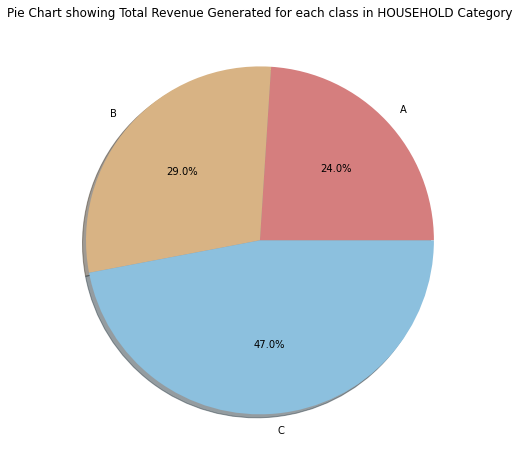

In [ ]:
df_plot = df.groupby('Pareto_Classification').sum()
plt.figure(figsize=(20,8))
colors = ["#D57E7E" ,"#D8B384","#8CC0DE"]
df_plot.reset_index(level=0,inplace=True)
df_plot['perc'] = df_plot['revenue']/sum(df_plot['revenue'].values)*100
plt.pie(df_plot['perc'].values,labels=df_plot['Pareto_Classification'].values,shadow=True,autopct='%1.1f%%',colors=colors)
plt.title("Pie Chart showing Total Revenue Generated for each class in HOUSEHOLD Category")
plt.show()

OBSERVATION: The above graph shows that the annual revenue of the household items is not divided according to the Pareto Law, which states that 80% of the revenue comes from the top 5% of the items.

However, we can observe that 80% of the revenue comes from the items from classes A and B combined, some items from class, in contradiction to the Pareto Law.

We can use this observations to make changes to the business model and the way the inventory is organized.

#Plot to show ABC Class analysis on HOUSEHOLD Category

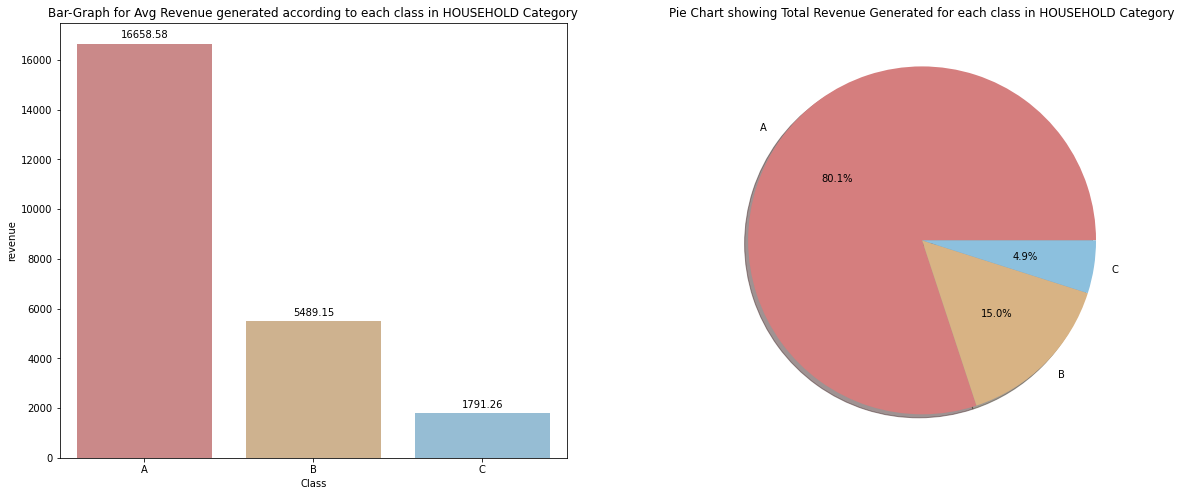

In [ ]:
df_plot = df.groupby('Class').mean()
df_plot.reset_index(level=0,inplace=True)
colors = ["#D57E7E" ,"#D8B384","#8CC0DE"]
p = [80, 15, 5]
plt.figure(figsize=(20,8))
plt.subplot(121)
ax = sns.barplot(x = 'Class', y = 'revenue', data = df_plot, palette = colors)
groupValues = ['80%', '15%', '5%']
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.2f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.title("Bar-Graph for Avg Revenue generated according to each class in HOUSEHOLD Category")

plt.subplot(122)
df_plot = df.groupby('Class').sum()
df_plot.reset_index(level=0,inplace=True)
df_plot['perc'] = df_plot['revenue']/sum(df_plot['revenue'].values)*100
plt.pie(df_plot['perc'].values,labels=df_plot['Class'].values,shadow=True,autopct='%1.1f%%',colors=colors)
plt.title("Pie Chart showing Total Revenue Generated for each class in HOUSEHOLD Category")
plt.show()

In [ ]:
data.head()

,item_id,dept_id,cat_id,store_id,d,sales,date,weekday,wday,month,...,snap_WI,sell_price,NAME,WT01,WT03,WT04,WT05,WT06,WT11,Med_Income
0,HOUSEHOLD_1_004,HOUSEHOLD_1,HOUSEHOLD,CA_2,d_1,1,2011-01-29,Saturday,1,1,...,0,1.98,"LOS GATOS, CA US",0.0,0.0,1.0,0.0,0.0,0.0,118713
1,HOUSEHOLD_1_004,HOUSEHOLD_1,HOUSEHOLD,CA_2,d_1,1,2011-01-29,Saturday,1,1,...,0,1.98,"LOS GATOS CALIFORNIA, CA US",0.0,1.0,0.0,0.0,0.0,0.0,118713
2,HOUSEHOLD_1_005,HOUSEHOLD_1,HOUSEHOLD,CA_2,d_1,2,2011-01-29,Saturday,1,1,...,0,10.72,"LOS GATOS, CA US",0.0,0.0,1.0,0.0,0.0,0.0,118713
3,HOUSEHOLD_1_005,HOUSEHOLD_1,HOUSEHOLD,CA_2,d_1,2,2011-01-29,Saturday,1,1,...,0,10.72,"LOS GATOS CALIFORNIA, CA US",0.0,1.0,0.0,0.0,0.0,0.0,118713
4,HOUSEHOLD_1_011,HOUSEHOLD_1,HOUSEHOLD,CA_2,d_1,1,2011-01-29,Saturday,1,1,...,0,4.63,"LOS GATOS, CA US",0.0,0.0,1.0,0.0,0.0,0.0,118713


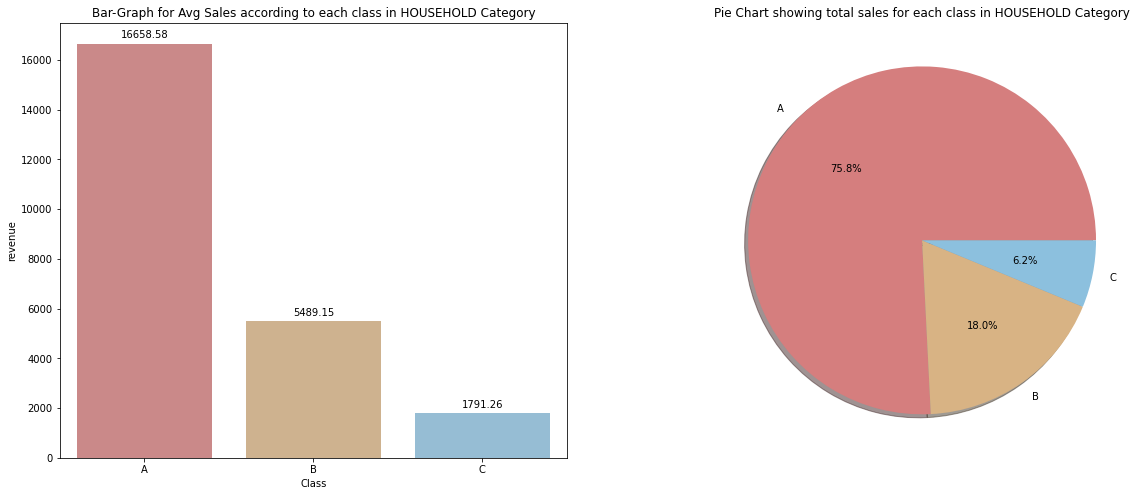

In [ ]:
df_plot = df.groupby('Class').mean()
df_plot.reset_index(level=0,inplace=True)
colors = ["#D57E7E" ,"#D8B384","#8CC0DE"]
plt.figure(figsize=(20,8))
plt.subplot(121)
ax = sns.barplot(x = 'Class', y = 'revenue', data = df_plot, palette = colors)
groupValues = ['80%', '15%', '5%']
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.2f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.title("Bar-Graph for Avg Sales according to each class in HOUSEHOLD Category")

plt.subplot(122)
df_plot = df.groupby('Class').sum()
df_plot.reset_index(level=0,inplace=True)
df_plot['perc'] = df_plot['sales']/sum(df_plot['sales'].values)*100
plt.pie(df_plot['perc'].values,labels=df_plot['Class'].values,shadow=True,autopct='%1.1f%%',colors=colors)
plt.title("Pie Chart showing total sales for each class in HOUSEHOLD Category")
plt.show()

Text(0.5, 0, 'Item Count')

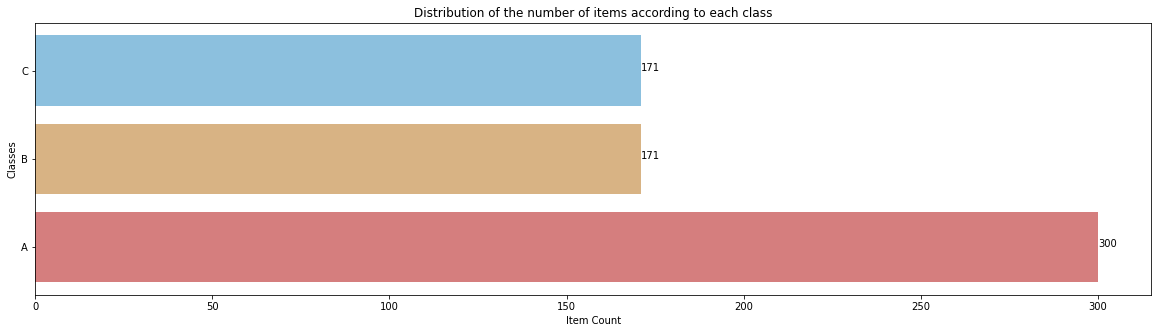

In [ ]:
x = [len(df[df['Class'] == 'A']), len(df[df['Class'] == 'B']), len(df[df['Class'] == 'C'])]
y = ['A','B','C']
plt.figure(figsize=(20,5))
b = plt.barh(y, x, color = ("#D57E7E" ,"#D8B384","#8CC0DE"))
for  bars in b:
    width = bars.get_width()
    label_y = bars.get_y() + bars.get_height() / 2
    plt.text(width, label_y, s=f'{width}')

plt.title('Distribution of the number of items according to each class')
plt.ylabel('Classes')
plt.xlabel('Item Count')

##Scatterplot describing classification of random 30 items in classes A, B, C.

In [ ]:
df_plot = df.copy()
df_plot = df_plot.sample(30)
df_plot = df_plot.sort_values(by=['revenue'], ascending=False)
df_plot = df_plot.reset_index()

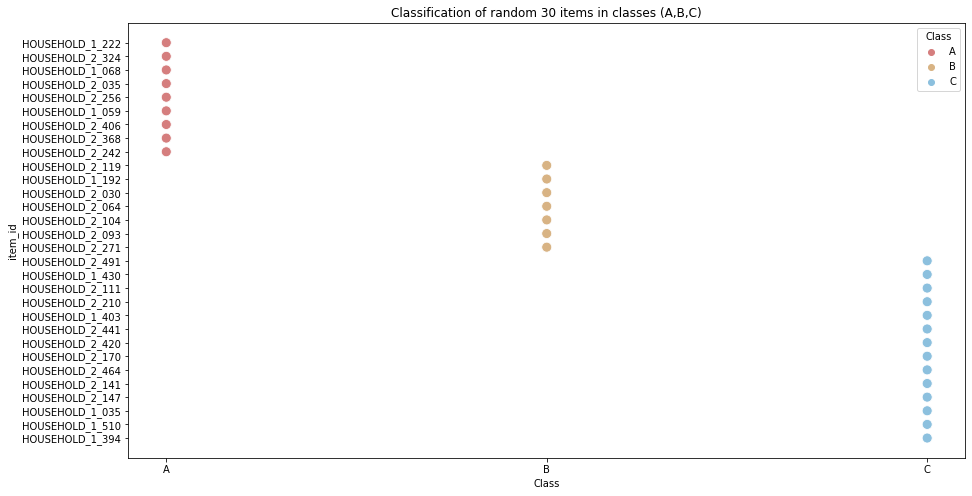

In [ ]:
fig = plt.gcf()
plt.title('Classification of random 30 items in classes (A,B,C)')
fig.set_size_inches(15, 8)
sns.scatterplot(x=df_plot['Class'], y=df_plot['item_id'], data=df_plot, hue=df_plot['Class'], s = 100, palette = ["#D57E7E" ,"#D8B384","#8CC0DE"])

In [ ]:
df_plot = df.copy()
df_plot = df_plot.reset_index()
s_per = [(len(df[df['Class'] == 'A'])*100)/642, (len(df[df['Class'] == 'B'])*100)/642, (len(df[df['Class'] == 'C'])*100)/642]

In [ ]:
total_sales = df_plot['sales'].sum()
df_plot['sales_per'] = round((df_plot['sales']/total_sales) * 100,2)

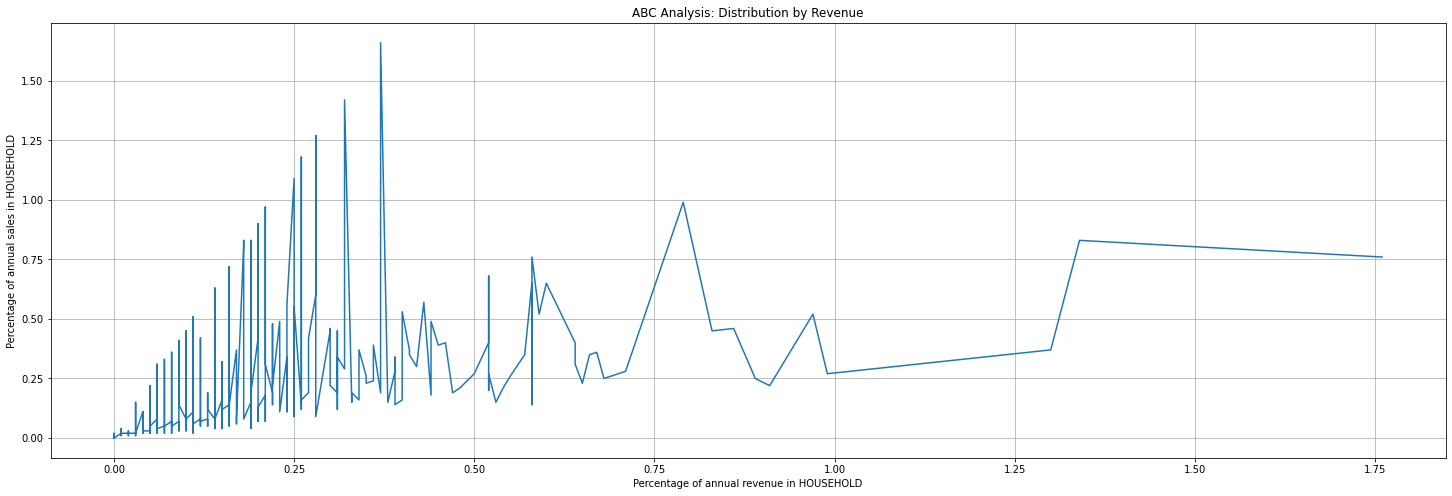

In [ ]:
y = df_plot['sales_per']
x = df_plot['percentage']
plt.figure(figsize=(25,8))
plt.title("ABC Analysis: Distribution by Revenue")
plt.xlabel("Percentage of annual revenue in HOUSEHOLD")
plt.ylabel("Percentage of annual sales in HOUSEHOLD")

plt.plot(x, y)

plt.grid()

plt.show()

In [ ]:
nA = sum(df['Class'] == 'A')
nB = sum(df['Class'] == 'B')
nC = sum(df['Class'] == 'C')

In [ ]:
t = df.groupby('Class').sum('percentage')   
t

,sell_price,sales,revenue,percentage
Class,,,,
A,1800.84,1103374,4997572.55,80.00
B,896.42,261536,938645.33,15.03
C,806.45,90749,306304.81,4.90


In [ ]:
table1 = [['Class A:', 'the top 5%'], 
         ['- Number of items: ', nA], 
         ['- Percentage Revenue in Household Category: ', '{:.2f}%'.format(t['percentage'][0])]]

table2 = [['Class B:', 'the following 15%'], 
         ['- Number of items: ', nB], 
         ['- Percentage Revenue in Household Category: ', '{:.2f}%'.format(t['percentage'][1])]]

table3 = [['Class C:', 'the 80% slow movers'], 
         ['- Number of items: ', nC], 
         ['- Percentage Revenue in Household Category: ', '{:.2f}%'.format(t['percentage'][2])]]

print(tabulate(table1, headers='firstrow'),"\n")
print(tabulate(table2, headers='firstrow'),"\n")
print(tabulate(table3, headers='firstrow'),"\n")

Class A:                                     the top 5%
-------------------------------------------  ------------
- Number of items:                           300
- Percentage Revenue in Household Category:  80.00% 

Class B:                                     the following 15%
-------------------------------------------  -------------------
- Number of items:                           171
- Percentage Revenue in Household Category:  15.03% 

Class C:                                     the 80% slow movers
-------------------------------------------  ---------------------
- Number of items:                           171
- Percentage Revenue in Household Category:  4.90% 



###Now we calculate the coefficient of variance to see how much the sales and revenue are spread over the dataset.

#Coefficient of Variance

In [ ]:
df = saleste_data.copy()

In [ ]:
# -- Parameters
# Columns
COLS_ITM = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']
# Take the first year data
COLS_DATE = ['d_' + str(i) for i in range(1, 366)]

In [ ]:
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_356,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,1,8,1,3,0,1,2,3
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Change id to match with price dataframe
df['id'] = df['store_id'] + '-' + df['item_id']

In [ ]:
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_356,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365
0,CA_1-HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CA_1-HOBBIES_1_002,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,CA_1-HOBBIES_1_003,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CA_1-HOBBIES_1_004,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,1,8,1,3,0,1,2,3
4,CA_1-HOBBIES_1_005,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
df_abc = df[df['cat_id']=='HOUSEHOLD'].copy()
df_abc = df_abc.groupby(['item_id', 'dept_id', 'cat_id']).sum()

# Calculate mean and standard deviation
# Mean
df_abc['mean'] = df_abc[COLS_DATE].mean(axis = 1)
# Filter out the reference without sales
df_abc = df_abc[df_abc['mean']>0]
# Standard Deviation
df_abc['std'] = df_abc[COLS_DATE].std(axis = 1)
# Coefficient of Variation
df_abc['CV'] = df_abc['std']/df_abc['mean']

In [ ]:
df_abc.sample(5)

,,,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_359,d_360,d_361,d_362,d_363,d_364,d_365,mean,std,CV
item_id,dept_id,cat_id,,,,,,,,,,,,,,,,,,,,,
HOUSEHOLD_1_162,HOUSEHOLD_1,HOUSEHOLD,3,3,0,4,3,15,35,15,7,7,...,14,11,8,6,7,10,14,13.016438,6.253768,0.480452
HOUSEHOLD_2_317,HOUSEHOLD_2,HOUSEHOLD,3,2,0,2,2,1,2,2,1,0,...,0,1,1,2,1,1,1,1.969863,1.551912,0.787827
HOUSEHOLD_1_375,HOUSEHOLD_1,HOUSEHOLD,8,2,6,2,1,5,9,9,6,6,...,6,6,4,4,5,2,1,4.616438,2.586047,0.560182
HOUSEHOLD_1_452,HOUSEHOLD_1,HOUSEHOLD,14,7,10,5,10,13,11,21,8,8,...,16,3,7,3,7,8,8,10.101370,4.729859,0.468239
HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,2,4,0,3,1,2,2,4,1,2,...,3,0,1,1,0,0,3,1.235616,1.298496,1.050889


In [ ]:
df_abc = df_abc.reset_index()

In [ ]:
df_plot = df_abc[['item_id', 'std', 'CV']].copy()
df_plot = df_plot.set_index('item_id')
df_plot.head()

,std,CV
item_id,,
HOUSEHOLD_1_001,2.063595,0.648761
HOUSEHOLD_1_002,2.171559,0.649156
HOUSEHOLD_1_004,12.215944,1.333379
HOUSEHOLD_1_005,5.464366,0.798756
HOUSEHOLD_1_006,4.543668,1.312056


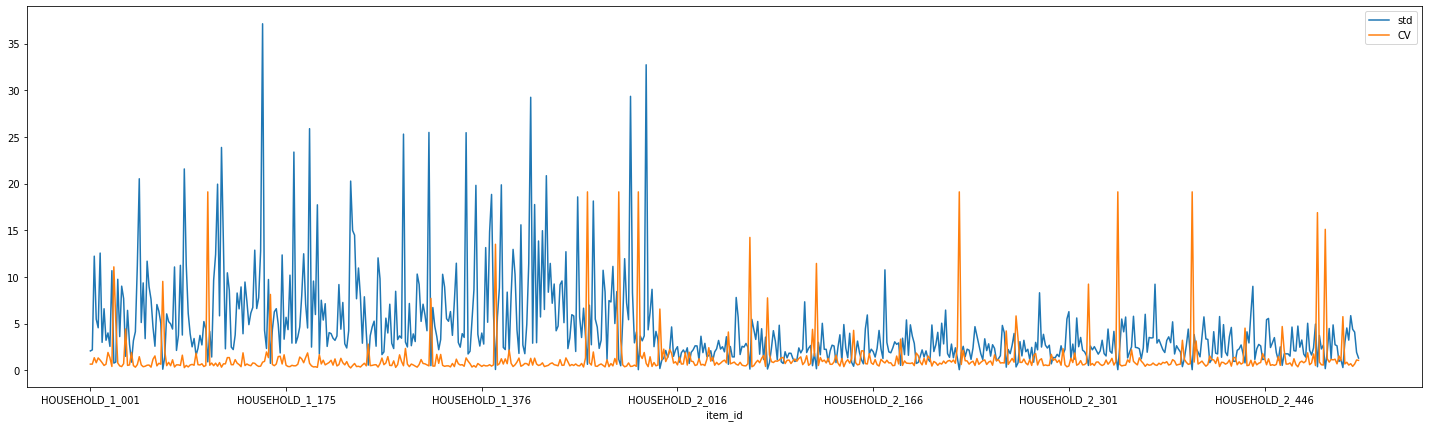

In [ ]:
df_plot.plot(figsize=(25,7))

OBSERVATIONS: From the above graph, we can observe that the sales of items in the range of about 125 to 150 deviate the most from the mean sales and would constitue most to the overall sales.

We also observe that sales of some of the items like item HOUSEHOLD_1_100, HOUSEHOLD_1_180, HOUSEHOLD_2_001, etc tend to vary more than other items. These items need to be accounted for more and their counting should be done more often compared to other items.

#INITIATIVES

1. California constitutes 50% of the total sales in the HOBBIES category across the 10 stores.

In [ ]:
d_hobbies = data_in.copy()

In [ ]:
d_hobbies.drop(d_hobbies[data_in['cat_id'] == 'FOODS'].index, inplace = True)
d_hobbies.drop(d_hobbies[data_in['cat_id'] == 'HOUSEHOLD'].index, inplace = True)
d_hobbies.shape

<ipython-input-259-853bdc2f4ccf>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d_hobbies.drop(d_hobbies[data_in['cat_id'] == 'HOUSEHOLD'].index, inplace = True)


(338451, 22)

In [ ]:
d_hobbies = d_hobbies[['d', 'cat_id','sales']]

In [ ]:
d_hobbies.head()

,d,cat_id,sales
0,d_1,HOBBIES,12
1,d_2,HOBBIES,15
2,d_6,HOBBIES,4
3,d_7,HOBBIES,6
4,d_1,HOBBIES,2


In [ ]:
d_hobbies = d_hobbies.groupby(["d","cat_id"]).sales.sum().reset_index()

In [ ]:
d_hobbies.head()

,d,cat_id,sales
0,d_1,HOBBIES,3764
1,d_10,HOBBIES,2615
2,d_100,HOBBIES,2880
3,d_101,HOBBIES,2670
4,d_102,HOBBIES,2584


In [ ]:
d_hobbies.drop_duplicates(subset=['d'], keep="last", inplace = True)

In [ ]:
d_h = d_hobbies.pivot(index='d', columns='cat_id')['sales']
d_hobbies = d_hobbies.merge(d_h, on="d")
d_hobbies = d_hobbies.drop(['cat_id','sales'], axis = 1)

In [ ]:
d_hobbies.head()

,d,HOBBIES
0,d_1,3764
1,d_10,2615
2,d_100,2880
3,d_101,2670
4,d_102,2584


In [ ]:
d_hobbies.shape

(364, 2)

In [ ]:
d_hobbies = d_hobbies.drop(['d'], axis = 1)

In [ ]:
d_hobbies.head()

,HOBBIES
0,3764
1,2615
2,2880
3,2670
4,2584


In [ ]:
standev = d_hobbies.std(axis=1)
rowmean = d_hobbies.mean(axis=1)

standev = standev[0]
rowmean = rowmean[0]
ncolumns = len(d_hobbies.columns)

rows = []

for i in range(10):
    noise = np.random.normal(rowmean , standev , ncolumns)
    d_hobbies.loc[len(d_hobbies)]=noise

In [ ]:
d_hobbies.shape

(374, 1)

In [ ]:
#Analyzing time series is stationary or not
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math

def test_stationarityDF(timeseries): ##Dickey-Fuller Test
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','No of Observesations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Test Statistic               -3.73765
p-value                       0.00361
#Lags Used                   15.00000
No of Observesations Used   358.00000
Critical Value (1%)          -3.44875
Critical Value (5%)          -2.86965
Critical Value (10%)         -2.57109
dtype: float64


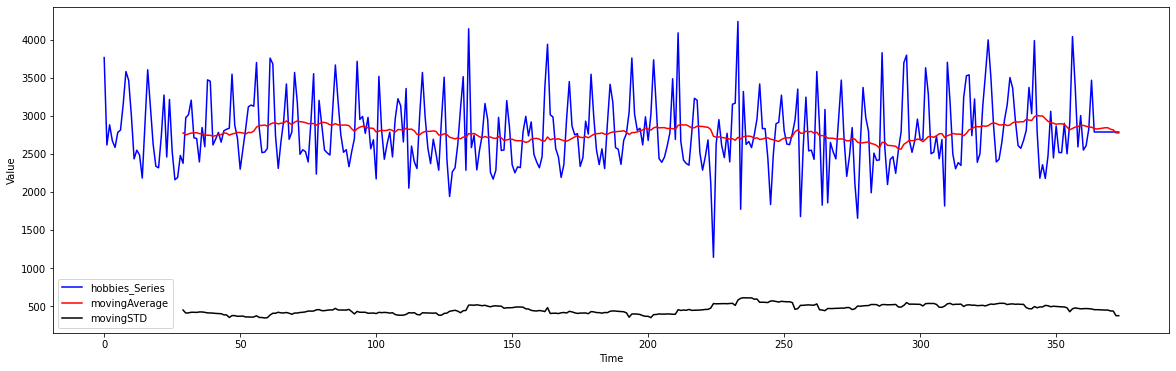

In [ ]:
#Time series for Hobiies Category
hobbies_Series = d_hobbies['HOBBIES']
hobbies_Series.fillna(hobbies_Series.mean(),inplace=True)
test_stationarityDF(hobbies_Series)

movingAverage = hobbies_Series.rolling(window=30).mean()
movingSTD = hobbies_Series.rolling(window=30).std().round()
plt.figure(figsize=(20,6))
plt.xlabel("Time")
plt.ylabel("Value")
plt.plot(hobbies_Series,color='blue',label='hobbies_Series')
plt.plot(movingAverage,color='red',label='movingAverage')
plt.plot(movingSTD,color='black',label='movingSTD')
plt.legend(loc='best')
plt.show()

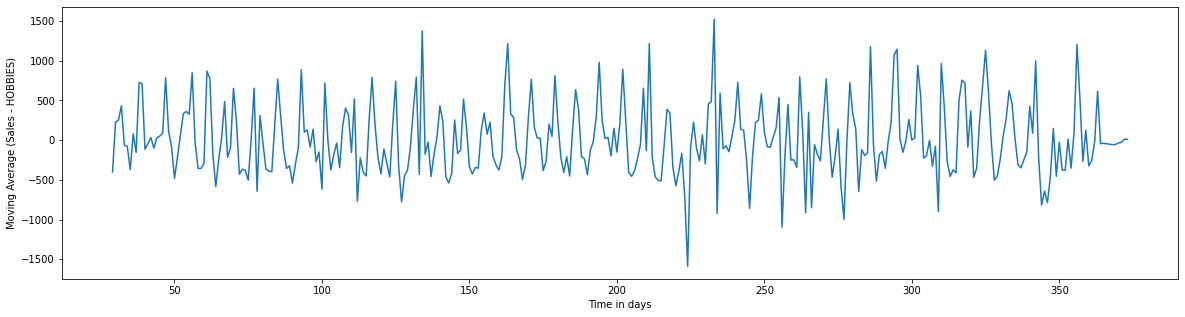

Test Statistic               -4.44168
p-value                       0.00025
#Lags Used                   15.00000
No of Observesations Used   358.00000
Critical Value (1%)          -3.44875
Critical Value (5%)          -2.86965
Critical Value (10%)         -2.57109
dtype: float64


In [ ]:
#Making Hobbies series stationary
hobbiesSeriesDiff = hobbies_Series-movingAverage
plt.figure(figsize=(20,5))
plt.xlabel("Time in days")
plt.ylabel("Moving Average (Sales - HOBBIES)")
plt.plot(hobbiesSeriesDiff)
plt.show()
pd.set_option('display.float_format', '{:.5f}'.format)
hobbiesSeriesDiff.fillna(hobbiesSeriesDiff.mean(),inplace=True)
test_stationarityDF(hobbiesSeriesDiff)

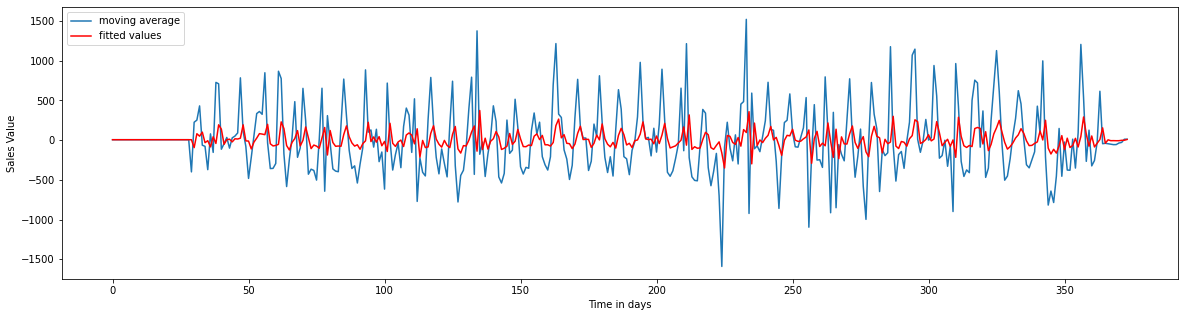

In [ ]:
model_hobbies = ARIMA(hobbiesSeriesDiff,order=(1,0,1))
results_ARIMA_hobbies = model_hobbies.fit()
plt.figure(figsize=(20,5))
plt.xlabel("Time in days")
plt.ylabel("Sales Value")
plt.plot(hobbiesSeriesDiff,label='moving average')
plt.plot(results_ARIMA_hobbies.fittedvalues, color='red',label='fitted values')
plt.legend(loc='best')
plt.show()

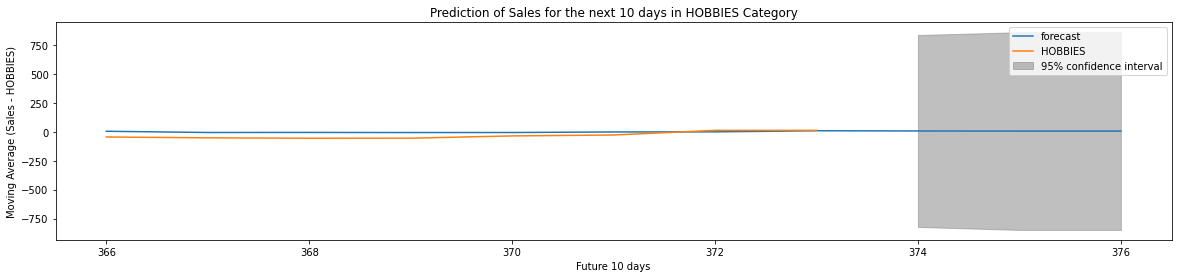

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
f = results_ARIMA_hobbies.plot_predict(366, 376, dynamic=False)
f.set_figwidth(20)
f.set_figheight(4)
plt.xlabel("Future 10 days")
plt.ylabel("Moving Average (Sales - HOBBIES)")
plt.title("Prediction of Sales for the next 10 days in HOBBIES Category")
plt.show()

We can see a significant increase in the number of forecasted sales. Hence, this initiative will certainly yield more sales in the future.




In [ ]:
data_in = data_in.groupby(['cat_id','state_id']).agg({"sales":"sum"}).groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()
data_in.columns = [f'{i}_{j}' if j != '' else f'{i}' for i,j in data_in.columns]

In [ ]:
data_in

,sales_CA,sales_TX,sales_WI
cat_id,,,
FOODS,43.37492,31.85724,24.76784
HOBBIES,50.53875,24.09529,25.36596
HOUSEHOLD,45.71923,29.12053,25.16024


Text(0.5, 1.0, 'Sales Distrubution for each category across states')

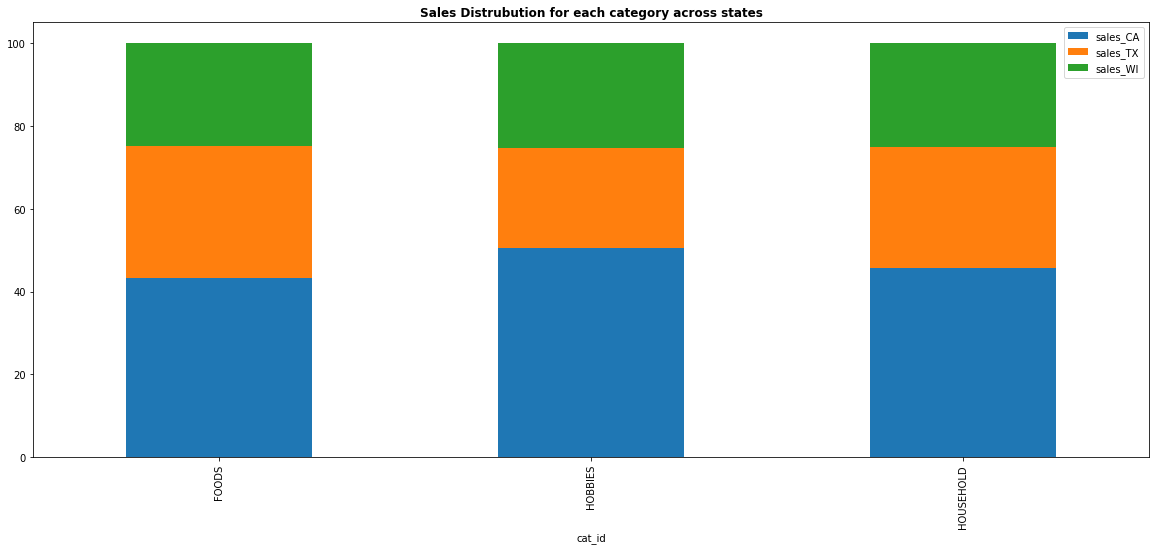

In [ ]:
data_in.plot(kind='bar', stacked=True, figsize=(20,8))
plt.title("Sales Distrubution for each category across states",fontweight = "bold")

It can be observed that California constitutes 50% of the total sales in the HOBBIES category. This shows that CA residents are more willing to spend on their hobbies. Hence, we recommend to include more diverse items in this category (in the average and above average price range) to attract all sections of people. This will enhance the sales associated with Hobbies and help in increase in the overall profit.
